In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
import os
import re

plt.style.use("seaborn-v0_8")

# Ensure directories exist
os.makedirs("processed_data", exist_ok=True)
os.makedirs("figures", exist_ok=True)


In [6]:
# --- 1️⃣ Extract Numeric Position from Mutation ---
def extract_position(df, mutation_col="Mutation"):
    df = df.copy()
    df["Position"] = df[mutation_col].astype(str).str.extract(r"(\d+)").astype(float)
    return df


In [7]:
# --- 2️⃣ Merge RSA with dataset ---
def merge_rsa(rsa_df, dataset_df, rsa_key="ResNum", data_key="Position"):
    return pd.merge(dataset_df, rsa_df, left_on=data_key, right_on=rsa_key, how="left")

In [8]:
# --- 3️⃣ Compute Spearman correlations ---
def compute_rsa_correlations(merged_df, outcome_cols):
    results = []

    for col in outcome_cols:
        valid = merged_df[[col, "RSA"]].dropna()
        if len(valid) < 3:
            continue

        rho, p = spearmanr(valid[col], valid["RSA"])
        
        results.append({
            "Outcome": col,
            "Spearman_rho": rho,
            "p_value": p,
            "N": len(valid),
        })
    
    return pd.DataFrame(results)


In [9]:
# --- 4️⃣ Plot multi-panel scatter plot and save ---
def plot_scatter_panel(merged_df, outcome_cols, dataset_name, save_dir="figures"):
    n = len(outcome_cols)
    rows = int(np.ceil(n / 2))

    fig, axes = plt.subplots(rows, 2, figsize=(12, rows * 5))
    axes = axes.flatten()

    for i, col in enumerate(outcome_cols):
        ax = axes[i]
        sns.regplot(
            data=merged_df,
            x="RSA",
            y=col,
            scatter_kws={"alpha": 0.6},
            ax=ax
        )
        ax.set_title(f"{col} vs RSA", fontsize=14)

    # Turn off extra plots if uneven
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()

    # Clean name for filename
    fname = re.sub(r"[^A-Za-z0-9]+", "_", dataset_name)

    save_path = os.path.join(save_dir, f"{fname}_RSA_scatter_panel.png")
    plt.savefig(save_path, dpi=300)
    plt.show()

    print(f"📊 Saved scatter panel → {save_path}")


> **Note:**  
> Use the DATASET TEMPLATES below to run the codes

In [ ]:
# DATA_NAME = "PSEN1_Sun"
# RSA_FILE = "processed_data/PSEN1_AF3_RSA.csv"
# DATASET_FILE = "raw_data/PSEN1_Sun.csv"
# OUTCOME_COLUMNS = ["AAO", "Total Activity", "Amount of Ab42", "Amount of Ab40", "Ab42/Ab40 ratio"]


In [ ]:
# DATA_NAME = "PSEN1_Petit"
# RSA_FILE = "processed_data/PSEN1_AF3_RSA.csv"
# DATASET_FILE = "raw_data/PSEN1_Petit.csv"
# OUTCOME_COLUMNS = ["Aβ37 [%]", "Aβ38 [%]", "Aβ40 [%]", "Aβ42 [%]", "Aβ43 [%]"]

In [ ]:
# DATA_NAME = "PSEN1_Pillai"
# RSA_FILE = "processed_data/PSEN1_AF3_RSA.csv"
# DATASET_FILE = "raw_data/PSEN1_Pillai.csv"
# OUTCOME_COLUMNS = ["Aβ40 (relative to WT)", "Aβ42 (relative to WT)", "Aβ42/40"]

In [ ]:
# DATA_NAME = "PSEN2_Pillai"
# RSA_FILE = "processed_data/PSEN2_AF3_RSA.csv"
# DATA_FILE = "raw_data/PSEN2_Pillai.csv"
# OUTCOME_COLUMNS = ["Aβ40 (relative to WT)", "Aβ42 (relative to WT)", "Aβ42/40"]

In [41]:
DATA_NAME = "APP_Pillai"
RSA_FILE = "processed_data/APP_AF3_RSA.csv"
DATA_FILE = "raw_data/APP_Pillai.csv"
OUTCOME_COLUMNS = ["Aβ40 (relative to WT)", "Aβ42 (relative to WT)", "Aβ42/40"]

In [42]:
# --- 5️⃣ Load Files ---
rsa_df = pd.read_csv(RSA_FILE)
dataset_df = pd.read_csv(DATASET_FILE)


In [43]:
# --- 6️⃣ Prepare Dataset ---
dataset_df = extract_position(dataset_df, mutation_col="Mutation")
dataset_df.head()


,Variant,Mutation,Aβ40 (relative to WT),Significant?,Aβ42 (relative to WT),Significant?.1,Aβ42/40,Significant?.2,variant_id_hg38,variant_id_hg19,...,fathmm-XF_coding_score,fathmm-XF_coding_rankscore,fathmm-XF_coding_pred,Eigen-raw_coding,Eigen-raw_coding_rankscore,Eigen-phred_coding,Eigen-PC-raw_coding,Eigen-PC-raw_coding_rankscore,Eigen-PC-phred_coding,Position
0,PSEN1:p.Arg35Gln,R35Q,0.89720,No,1.1254,No,1.1399,No,14-73170813-G-A,14-73637521-G-A,...,0.361677,0.44935,N,-0.683929,0.16279,0.839981,-0.500256,0.21837,1.201499,35.0
1,PSEN1:p.Glu69Asp,E69D,1.63970,Yes,2.4060,Yes,1.3462,No,14-73170916-A-T,14-73637624-A-T,...,0.299910,0.40688,N,-0.869309,0.11440,0.559485,-0.735757,0.15808,0.848556,69.0
2,PSEN1:p.Ala79Val,A79V,0.92647,No,1.9208,Yes,1.9063,Yes,14-73170945-C-T,14-73637653-C-T,...,0.928313,0.91201,D,0.837492,0.88323,9.558504,0.766865,0.87344,9.212799,79.0
3,PSEN1:p.Met84Val,M84V,0.78710,No,1.6763,Yes,1.9532,Yes,14-73170959-A-G,14-73637667-A-G,...,0.952692,0.96826,D,0.806133,0.86416,8.901700,0.766364,0.87304,9.200018,84.0
4,PSEN1:p.Val97Met,V97M,0.15000,Yes,0.3600,Yes,2.3500,Yes,14-73170998-G-A,14-73637706-G-A,...,0.941647,0.94501,D,1.022792,0.96383,14.652660,0.938540,0.97027,15.506970,97.0


In [44]:
# --- 7️⃣ Merge RSA + Dataset ---
merged_df = merge_rsa(rsa_df, dataset_df)
merged_df.head()


,Variant,Mutation,Aβ40 (relative to WT),Significant?,Aβ42 (relative to WT),Significant?.1,Aβ42/40,Significant?.2,variant_id_hg38,variant_id_hg19,...,Eigen-raw_coding_rankscore,Eigen-phred_coding,Eigen-PC-raw_coding,Eigen-PC-raw_coding_rankscore,Eigen-PC-phred_coding,Position,ResNum,AA,ACC,RSA
0,PSEN1:p.Arg35Gln,R35Q,0.89720,No,1.1254,No,1.1399,No,14-73170813-G-A,14-73637521-G-A,...,0.16279,0.839981,-0.500256,0.21837,1.201499,35.0,35,A,0,0.000
1,PSEN1:p.Glu69Asp,E69D,1.63970,Yes,2.4060,Yes,1.3462,No,14-73170916-A-T,14-73637624-A-T,...,0.11440,0.559485,-0.735757,0.15808,0.848556,69.0,69,I,3,0.015
2,PSEN1:p.Ala79Val,A79V,0.92647,No,1.9208,Yes,1.9063,Yes,14-73170945-C-T,14-73637653-C-T,...,0.88323,9.558504,0.766865,0.87344,9.212799,79.0,79,E,182,0.850
3,PSEN1:p.Met84Val,M84V,0.78710,No,1.6763,Yes,1.9532,Yes,14-73170959-A-G,14-73637667-A-G,...,0.86416,8.901700,0.766364,0.87304,9.200018,84.0,84,N,13,0.070
4,PSEN1:p.Val97Met,V97M,0.15000,Yes,0.3600,Yes,2.3500,Yes,14-73170998-G-A,14-73637706-G-A,...,0.96383,14.652660,0.938540,0.97027,15.506970,97.0,97,W,2,0.008


In [45]:
# --- 8️⃣ Compute RSA Correlations ---
corr_df = compute_rsa_correlations(merged_df, OUTCOME_COLUMNS)
corr_df

,Outcome,Spearman_rho,p_value,N
0,Aβ40 (relative to WT),-0.002359,0.986233,56
1,Aβ42 (relative to WT),0.001111,0.993516,56
2,Aβ42/40,0.029980,0.826384,56


In [46]:
# --- 9️⃣ Save the correlation ---
csv_out = f"processed_data/{DATA_NAME}_RSA_correlations.csv"
corr_df.to_csv(csv_out, index=False)
print(f"📁 Saved correlations → {csv_out}")

📁 Saved correlations → processed_data/APP_Pillai_RSA_correlations.csv


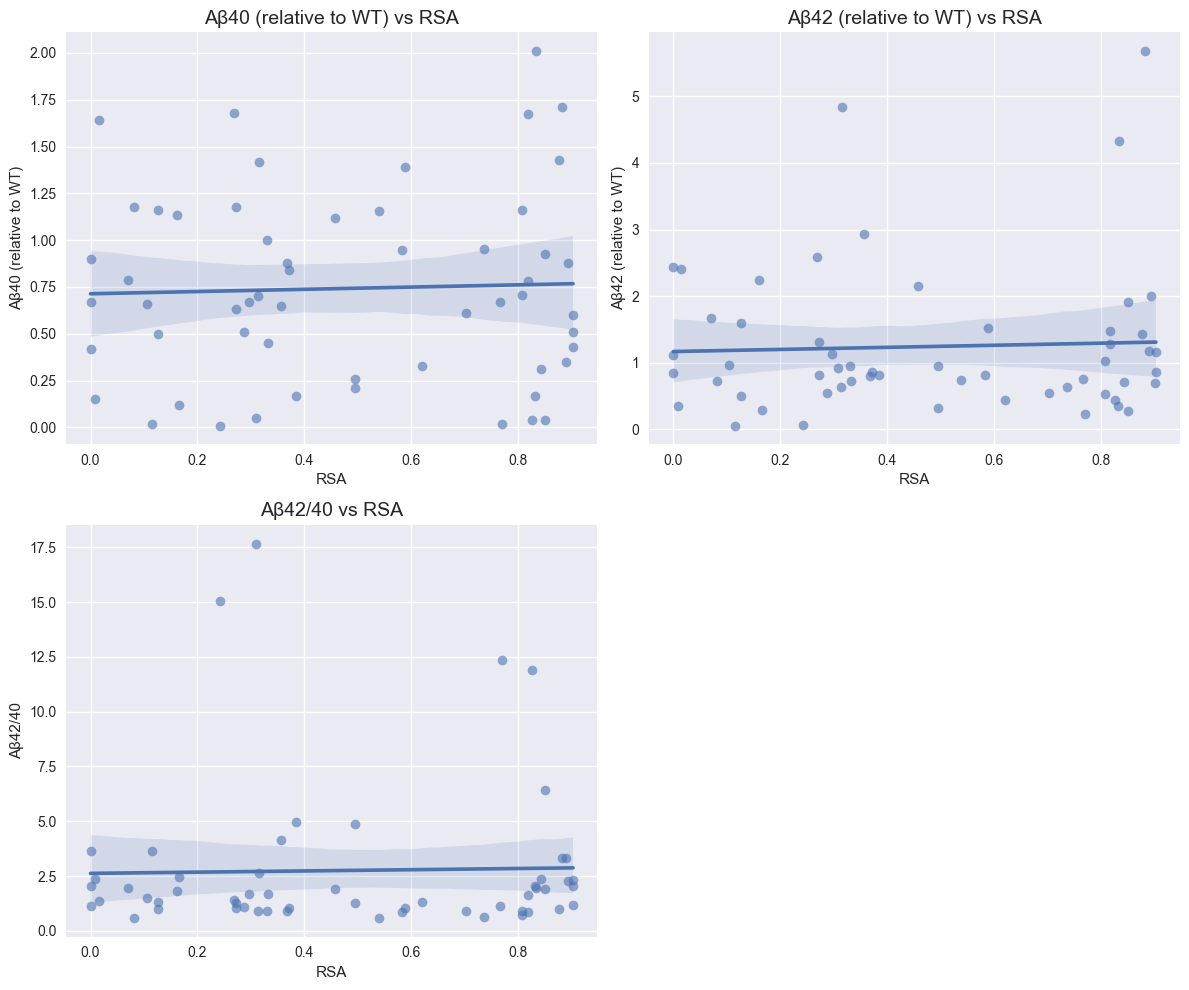

📊 Saved scatter panel → figures\APP_Pillai_RSA_scatter_panel.png


In [47]:
# --- 🔟 Scatter Plot Panel ---
plot_scatter_panel(
    merged_df,
    OUTCOME_COLUMNS,
    dataset_name=DATA_NAME,
    save_dir="figures"
)